# 点云投影到图片
代码参考：https://github.com/nutonomy/nuscenes-devkit

https://github.com/kuixu/kitti_object_vis/blob/master/kitti_util.py


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
# import pyquaternion
import json
import open3d as o3d
from PIL import Image
from projector import Projector
from pypcd import pypcd

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
# SUSTechPOINTS data
ROOT_DIR = "/home/work/github/sensor-calibration/datas/sustech-example"
IMG = ROOT_DIR + "/camera/front/000965.jpg"
PCD = ROOT_DIR + "/lidar/000965.pcd"
CALIB_FILE = ROOT_DIR + "/calib/camera/front.json"

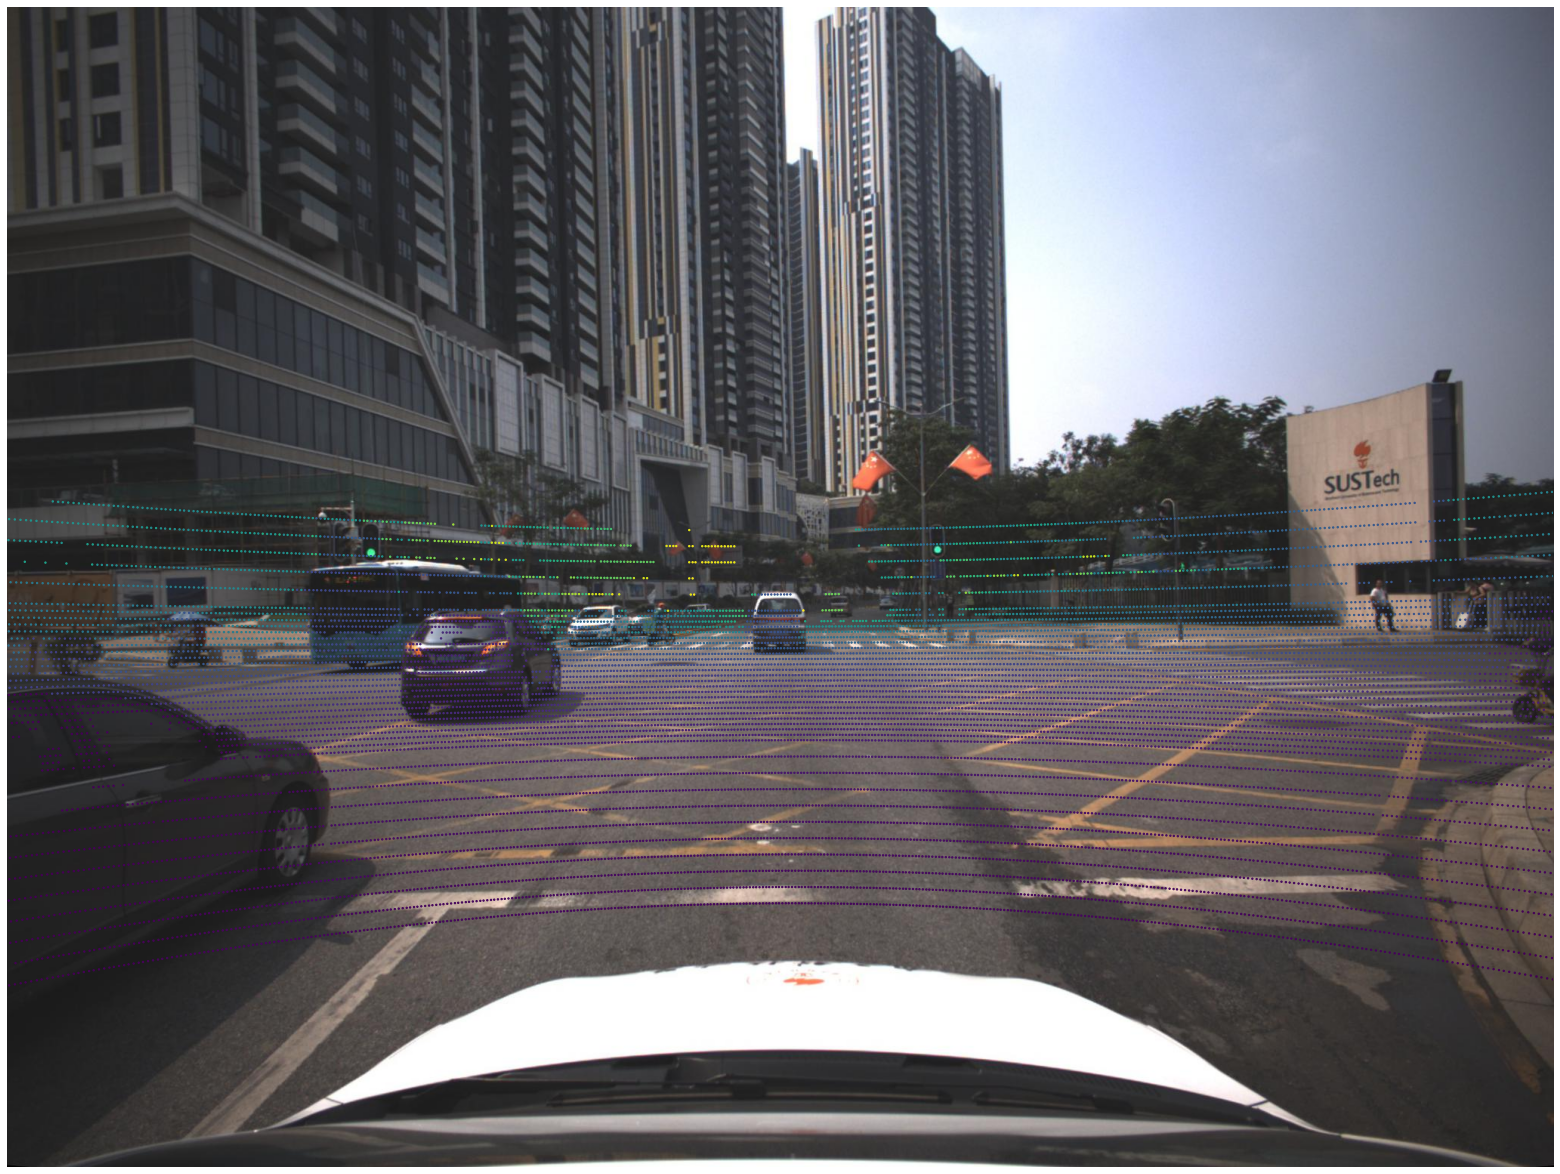

In [8]:
calib_j = json.load(open(CALIB_FILE))
extrinsic = np.array(calib_j['extrinsic']).reshape(4, 4)
extrinsic = Projector.inverse_rigid_trans(extrinsic)
intrinsic = np.array(calib_j['intrinsic']).reshape(3, 3)
img = Image.open(IMG)
pcd = o3d.io.read_point_cloud(PCD)
pts = np.asarray(pcd.points) # n, 3

points, coloring = Projector.map_pointcloud_to_image(img, pts, extrinsic, intrinsic)

fig, ax = plt.subplots(1, 1)
w, h = img.size
fig.set_size_inches(w/fig.dpi, h/fig.dpi)
ax.imshow(img)
ax.scatter(points[0, :], points[1, :], c=coloring, s=2)
ax.axis('off')
plt.savefig("./imgs/point_img.png")
plt.show()

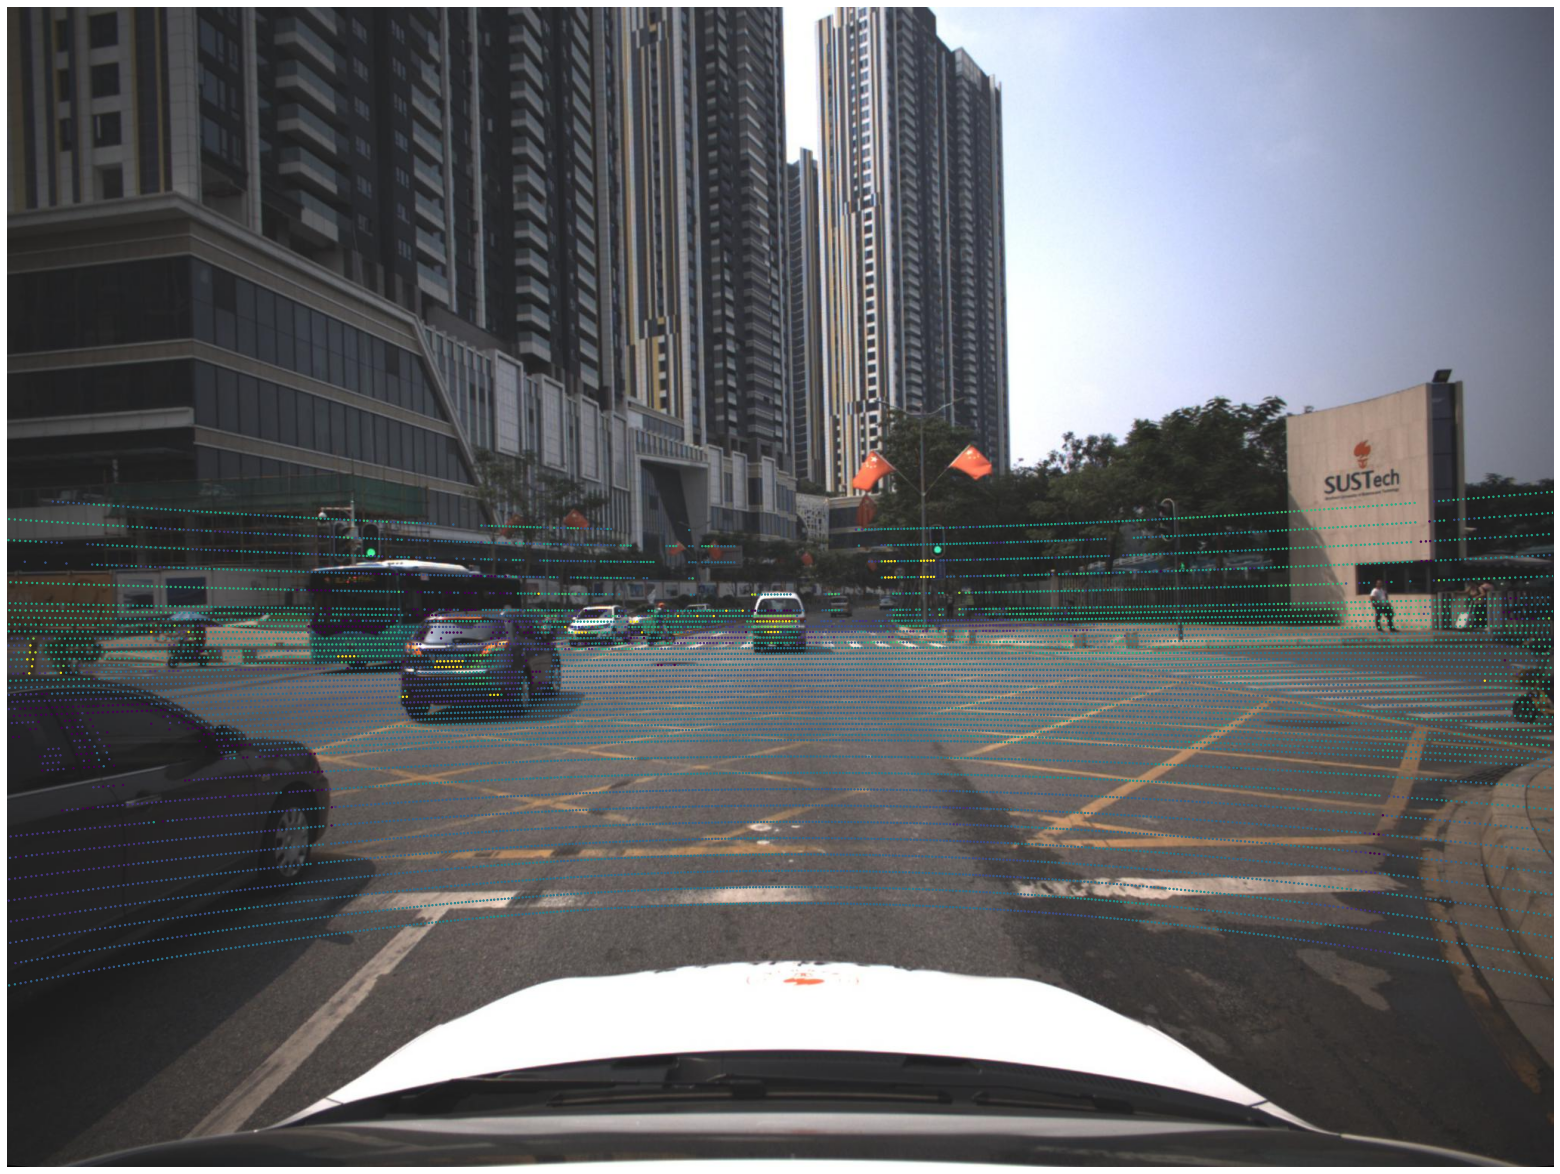

In [9]:
pc = pypcd.PointCloud.from_path(PCD)
pts = np.stack([pc.pc_data['x'], pc.pc_data['y'], pc.pc_data['z'], pc.pc_data['intensity']]).T

points, coloring = Projector.map_pointcloud_to_image(img, pts, extrinsic, intrinsic, coloring=Projector.Coloring.INTENSITY)

fig, ax = plt.subplots(1, 1)
w, h = img.size
fig.set_size_inches(w/fig.dpi, h/fig.dpi)
ax.imshow(img)
ax.scatter(points[0, :], points[1, :], c=coloring, s=2)
ax.axis('off')
plt.savefig("./imgs/point_img2.png")
plt.show()